<a href="https://colab.research.google.com/github/angelikipilioura/Computational-Data-Journalism/blob/main/Homework_for_lesson8_Angeliki_Pilioura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# για το scraping
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# για τα nan values
import numpy as np

# για τα γραφήματα
import matplotlib.pyplot as plt

# για την επεξεργασία ελληνικών κειμένων
import spacy

In [2]:
!python -m spacy download el_core_news_sm

2023-06-04 21:52:38.290613: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 18.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [3]:
# test_url = 'https://www.news247.gr/ekloges-2023' 
test_url = 'https://www.newsit.gr/tags/ekloges/'

# κατεβάζουμε τη δοκιμαστική σελίδα 
response = requests.get(test_url)
doc = BeautifulSoup(response.text, 'html.parser')

# αποθηκεύω τη λίστα των άρθρων σε μια μεταβλητή
teaser_articles_list = doc.find('div', {'class': 'hfeed site grid-container container grid-parent'}).find_all('article')
teaser_articles_list[0]

<article class="">
<div class="image has-video">
<a href="https://www.newsit.gr/politikh/ekloges-2023-kavgas-sofias-voultepsi-kai-xristou-spirtzi-gia-programmata-kai-forous/3789810/" style="background-image:url('https://www.newsit.gr/wp-content/uploads/2023/06/voultepsi_spirtzis_04061-768x435.jpg');" title="Καβγάς Βούλτεψη με Σπίρτζη - «Η Ζαπορίζια να εκραγεί, ο Μητσοτάκης θα φταίει», «είσαι ψεύτρα και συκοφάντης»"></a>
</div>
<div>
<div class="entry-meta mb-05">
<span class="posted-on">
<time class="entry-date published" datetime="2023-06-04T13:41:49+03:00">
<svg aria-hidden="true" height="12" role="img" version="1.1" viewbox="0 0 12 12" width="12" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
<path class="st0" d="M6,0C2.7,0,0,2.7,0,6s2.7,6,6,6s6-2.7,6-6S9.3,0,6,0z M6,11C3.3,11,1,8.7,1,6S3.3,1.1,6,1.1s5,2.2,5,4.9
	S8.7,11,6,11z"></path>
<path class="st0" d="M6.6,6V2.7c0-0.3-0.3-0.4-0.5-0.4H5.9c-0.3,0-0.5,0.3-0.5,0.4v3.6c0,0.2,0,0.5,0.3,0.5l1.8,1.4
	c0.

In [4]:
# με το print και το prettify, μπορώ να δω το ίδιο πράγμα σε καλύτερη μορφή, ώστε να μη χρειάζεται να ξαναδώ την html στον inspector
print(teaser_articles_list[0].prettify())

<article class="">
 <div class="image has-video">
  <a href="https://www.newsit.gr/politikh/ekloges-2023-kavgas-sofias-voultepsi-kai-xristou-spirtzi-gia-programmata-kai-forous/3789810/" style="background-image:url('https://www.newsit.gr/wp-content/uploads/2023/06/voultepsi_spirtzis_04061-768x435.jpg');" title="Καβγάς Βούλτεψη με Σπίρτζη - «Η Ζαπορίζια να εκραγεί, ο Μητσοτάκης θα φταίει», «είσαι ψεύτρα και συκοφάντης»">
  </a>
 </div>
 <div>
  <div class="entry-meta mb-05">
   <span class="posted-on">
    <time class="entry-date published" datetime="2023-06-04T13:41:49+03:00">
     <svg aria-hidden="true" height="12" role="img" version="1.1" viewbox="0 0 12 12" width="12" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
      <path class="st0" d="M6,0C2.7,0,0,2.7,0,6s2.7,6,6,6s6-2.7,6-6S9.3,0,6,0z M6,11C3.3,11,1,8.7,1,6S3.3,1.1,6,1.1s5,2.2,5,4.9
	S8.7,11,6,11z">
      </path>
      <path class="st0" d="M6.6,6V2.7c0-0.3-0.3-0.4-0.5-0.4H5.9c-0.3,0-0.5,0.3-0.5

In [5]:
link = teaser_articles_list[0].find('a')['href']
print(link) # το κάνουμε print για να μας δώσει clicable link ώστε να το πατήσουμε και να βεβαιωθούμε ότι δουλεύει σωστά.

https://www.newsit.gr/politikh/ekloges-2023-kavgas-sofias-voultepsi-kai-xristou-spirtzi-gia-programmata-kai-forous/3789810/


In [6]:
datetime = teaser_articles_list[0].find('time')['datetime']
print(datetime) # το κάνουμε print για να μας δώσει clicable link ώστε να το πατήσουμε και να βεβαιωθούμε ότι δουλεύει σωστά.

2023-06-04T13:41:49+03:00


In [7]:
teasers_list = []

for teaser in teaser_articles_list:
    story_dict = {}
    try:
      
      #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στο link, ΜΕΤΑ το teaser
      link = teaser.find('a')['href']
      

      if link.startswith("http"):
        story_dict['url'] = link
    except:
      story_dict['url'] = ''
      pass
    teasers_list.append(story_dict)
time.sleep(1)

In [8]:
# Δημιουργούμε dataframe από τη λίστα με τα dictionaries
newsit_teasers_df = pd.DataFrame(teasers_list)
newsit_teasers_df

,url
0,https://www.newsit.gr/politikh/ekloges-2023-ka...
1,https://www.newsit.gr/politikh/giannis-oikonom...
2,https://www.newsit.gr/ellada/ekloges-2023-ti-i...
3,https://www.newsit.gr/politikh/ekloges-2023-pa...
4,https://www.newsit.gr/politikh/ekloges-2023-ni...
5,https://www.newsit.gr/ellada/ekloges-2023-pou-...
6,https://www.newsit.gr/politikh/ekloges-2023-ky...
7,https://www.newsit.gr/politikh/ekloges-25-ioun...
8,https://www.newsit.gr/politikh/ekloges-2023-ni...
9,https://www.newsit.gr/politikh/ekloges-2023-ak...


In [9]:
newsit_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/newsit_ekloges_2023_.csv', index=False)

In [10]:
article_url = 'https://www.newsit.gr/politikh/ekloges-2023-kyriakos-mitsotakis-ypirkse-anoikti-paremvasi-tou-tourkikou-prokseneiou-yper-sygkekrimenou-ypopsifiou-sti-rodopi/3789231/'

In [11]:
response = requests.get(article_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [12]:
article = doc.find('div', {'class': 'grid-container grid-parent'})
print(article.prettify())

<div class="grid-container grid-parent">
 <p id="breadcrumbs">
  <span>
   <span>
    <a href="https://www.newsit.gr/">
     <span class="home">
      NewsIT
     </span>
    </a>
    <span>
     <a href="https://www.newsit.gr/category/politikh/">
      Πολιτικη
     </a>
     <span aria-current="page" class="breadcrumb_last">
      Μητσοτακης: Υπηρξε ανοιχτη παρεμβαση του τουρκικου προξενειου υπερ συγκεκριμενου υποψηφιου στη Ροδοπη
     </span>
    </span>
   </span>
  </span>
 </p>
</div>



In [13]:
# Find all the 'a' tags in the article
links = article.find_all('a')

# If there are at least 2 links, print the text of the second one
if len(links) > 1:
    print(links[1].get_text(strip=True))

Πολιτικη


In [14]:
title = doc.find('h1', {'class': 'entry-title'}).text
title

'Εκλογές 2023 – Κυριάκος Μητσοτάκης: Υπήρξε ανοικτή παρέμβαση του τουρκικού προξενείου υπέρ συγκεκριμένου υποψηφίου στη Ροδόπη'

In [15]:
# η ημερομηνία είναι συνήθως σε tag <time>
date = doc.find('time')['datetime']
date

'2023-06-03T12:12:44+03:00'

In [16]:
author = doc.find('span', {'class', "author-name"}).text
author = author.strip()  
author = author.replace('\r', '').replace('\n', '').strip()
author

'Καρολινα Μισελ'

In [17]:
paragraphs = doc.find_all('p')
paragraphs

[<p id="breadcrumbs"><span><span><a href="https://www.newsit.gr/"><span class="home">NewsIT</span></a> <span><a href="https://www.newsit.gr/category/politikh/">Πολιτικη</a> <span aria-current="page" class="breadcrumb_last">Μητσοτακης: Υπηρξε ανοιχτη παρεμβαση του τουρκικου προξενειου υπερ συγκεκριμενου υποψηφιου στη Ροδοπη</span></span></span></span></p>,
 <p>Ζήτημα ανοιχτής παρέμβασης του τουρκικού προξενείου στην Κομοτηνή υπέρ του υποψηφίου βουλευτή του ΣΥΡΙΖΑ στη <a href="https://www.newsit.gr/tags/rodopi/" rel="noopener" target="_blank">Ροδόπη</a>, Φερχάτ Οζγκιούρ, έθεσε ο πρωθυπουργός <a href="https://www.newsit.gr/tags/kyriakos-mitsotakis/" rel="noopener" target="_blank">Κυριάκος Μητσοτάκης</a>, σε συνέντευξη που παραχώρησε στην εφημερίδα «Πρώτο ΘΕΜΑ».</p>,
 <p>«Στη Ροδόπη υπήρξε όντως ανοιχτή παρέμβαση του τουρκικού προξενείου υπέρ συγκεκριμένου υποψηφίου. Και αυτό είναι πρόβλημα», ανέφερε χαρακτηριστικά ο πρόεδρος της Νέας Δημοκρατίας, Κυριάκος Μητσοτάκης.</p>,
 <p class="adver

In [18]:
p_texts_list = []                      # δημιουργία κενής λίστας για να αποθηκεύσουμε το text κάθε παραγράφου
paragraphs = doc.find_all('p')         # λίστα με όλες τις παραγράφους
for p in paragraphs:                   # για κάθε μια από τις παραγράφους στη λίστα
  p_texts_list.append(p.text)          # πάρε το .text και πρόσθεσέ το στη λίστα με τα texts των παραγράφων
full_text = ' '.join(p_texts_list)     # συνένωση των texts των παραγράφων
full_text = "".join(full_text.splitlines())
full_text

'NewsIT Πολιτικη Μητσοτακης: Υπηρξε ανοιχτη παρεμβαση του τουρκικου προξενειου υπερ συγκεκριμενου υποψηφιου στη Ροδοπη Ζήτημα ανοιχτής παρέμβασης του τουρκικού προξενείου στην Κομοτηνή υπέρ του υποψηφίου βουλευτή του ΣΥΡΙΖΑ στη Ροδόπη, Φερχάτ Οζγκιούρ, έθεσε ο πρωθυπουργός Κυριάκος Μητσοτάκης, σε συνέντευξη που παραχώρησε στην εφημερίδα «Πρώτο ΘΕΜΑ». «Στη Ροδόπη υπήρξε όντως ανοιχτή παρέμβαση του τουρκικού προξενείου υπέρ συγκεκριμένου υποψηφίου. Και αυτό είναι πρόβλημα», ανέφερε χαρακτηριστικά ο πρόεδρος της Νέας Δημοκρατίας, Κυριάκος Μητσοτάκης.  Και συνέχισε: «Δεν γίνεται μια ξένη χώρα να παρεμβαίνει ανοιχτά υπέρ συγκεκριμένων υποψηφίων που αναφέρονται στο τουρκικό προξενείο κι όχι στην ελληνική συνταγματική έννομη τάξη. Είναι θέμα που πρέπει να απασχολήσει πρωτίστως το κόμμα που τον επέλεξε, καθώς καθίσταται συμμέτοχο στην ανάμειξη ενός άλλου κράτους στα εσωτερικά της Ελλάδας. Και προσοχή: Δεν μιλώ για όλους τους μειονοτικούς βουλευτές, ούτε για όλη τη μουσουλμανική μειονότητα. Έχω

In [19]:
newsit_teasers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/newsit_ekloges_2023_.csv')
newsit_teasers_df.head()

,url
0,https://www.newsit.gr/politikh/ekloges-2023-ka...
1,https://www.newsit.gr/politikh/giannis-oikonom...
2,https://www.newsit.gr/ellada/ekloges-2023-ti-i...
3,https://www.newsit.gr/politikh/ekloges-2023-pa...
4,https://www.newsit.gr/politikh/ekloges-2023-ni...


In [24]:
full_articles_list = []

for article_url in newsit_teasers_df['url']:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo article που βρήκατε παραπάνω***
  article = doc.find('div', {'class': 'grid-container grid-parent'})

  full_article_dict = {}
  
  # website
  full_article_dict['site'] = "newsit.gr"
  
  # url
  full_article_dict['url'] = article_url

  #section
  try:
    section = article.find_all('a')
    if len(section) > 1:
      full_article_dict['section'] = section[1].get_text(strip=True)
  except:
    full_article_dict['section'] = ''
    pass

  #title
  try:
    title = doc.find('h1', {'class': 'entry-title'}).text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = '' 
    pass

  # date
  try:
    date = doc.find('time')['datetime']  
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass

  # author
  try:
    author = doc.find('span', {'class', "author-name"}).text
    author = author.strip()  
    author = author.replace('\r', '').replace('\n', '').strip()
    full_article_dict['author'] = author
  except:
    full_article_dict['author'] = ''
    pass

  # full_text
  try:
    p_texts_list = []                      
    paragraphs = doc.find_all('p')
    for p in paragraphs:                  
      p_texts_list.append(p.text)      
    full_text = ' '.join(p_texts_list)  
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text  
  except:
    full_article_dict['full_text'] = '' 
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)

In [ ]:
newsit_full_articles_df = pd.DataFrame(full_articles_list)
newsit_full_articles_df

In [27]:
newsit_full_articles_df.to_csv('/content/drive/MyDrive/Colab Notebooks/full_articles_newsit_ekloges_2023_.csv', index=False)


In [28]:
newsit_full_articles_df.loc[0, 'full_text']

'NewsIT Πολιτικη Καβγας Βουλτεψη με Σπιρτζη - «Η Ζαποριζια να εκραγει, ο Μητσοτακης θα φταιει», «εισαι ψευτρα και συκοφαντης» «Μήλον της έριδος» αποτελεί ενόψει των εκλογών για τα στελέχη της ΝΔ και του ΣΥΡΙΖΑ η προτροπή του Αλέξη Τσίπρα στον Κυριάκο Μητσοτάκη να πάνε τα οικονομικά προγράμματα των κομμάτων στο Γενικό Λογιστήριο του Κράτους για κοστολόγηση, με τους τόνους να ανεβαίνουν μεταξύ της Σοφίας Βούλτεψη και του Χρήστου Σπίρτζη. Η Σοφία Βούλτεψη και ο Χρήστος Σπίρτζης μίλησαν στην τηλεόραση του MEGA το πρωί της Κυριακής ενόψει των εκλογών της 25ης Ιουνίου και οι τόνοι ανέβηκαν κατά τη διάρκεια της συζήτησης για τα οικονομικά προγράμματα της ΝΔ και του ΣΥΡΙΖΑ αλλά και το αίτημα του Αλέξη Τσίπρα για debate με τον Κυριάκο Μητσοτάκη.  «Το εργοστάσιο της Ζαπορίζια να εκραγεί, φταίει ο Μητσοτάκης», είπε χαρακτηριστικά η Σοφία Βούλτεψη, με τον Χρήστο Σπίρτζη να τη χαρακτηρίζει «ψεύτρα και συκοφάντη», όταν η υποψήφια βουλευτής της ΝΔ αναφέρθηκε στην οικονομική πολιτική του ΣΥΡΙΖΑ. «Να π

In [31]:
newsit_full_articles_df.loc[0, 'date']
newsit_full_articles_df['datetime'] = pd.to_datetime(newsit_full_articles_df['date'], format='%Y-%m-%d %H:%M')
newsit_full_articles_df.head()

,site,url,section,title,date,author,full_text,datetime
0,newsit.gr,https://www.newsit.gr/politikh/ekloges-2023-ka...,Πολιτικη,Εκλογές 2023: Καβγάς Σοφίας Βούλτεψη και Χρήστ...,2023-06-04T13:41:49+03:00,Κωνσταντινος Μακρης,NewsIT Πολιτικη Καβγας Βουλτεψη με Σπιρτζη - «...,2023-06-04 13:41:49+03:00
1,newsit.gr,https://www.newsit.gr/politikh/giannis-oikonom...,Πολιτικη,Γιάννης Οικονόμου για εκλογές: Ευθεία ανάμειξη...,2023-06-04T11:27:55+03:00,Καρολινα Μισελ,NewsIT Πολιτικη Γιαννης Οικονομου: Ευθεια αναμ...,2023-06-04 11:27:55+03:00
2,newsit.gr,https://www.newsit.gr/ellada/ekloges-2023-ti-i...,Ελλαδα,Εκλογές 2023: Τι ισχύει με τους ετεροδημότες κ...,2023-06-04T09:54:00+03:00,Μαιρη Καλουτσακη,NewsIT Ελλαδα Εκλογες 2023: Τι ισχυει με τους ...,2023-06-04 09:54:00+03:00
3,newsit.gr,https://www.newsit.gr/politikh/ekloges-2023-pa...,Πολιτικη,Εκλογές 2023 – ΠΑΣΟΚ: Η ευχή του γιου του Ούλω...,2023-06-04T09:13:57+03:00,Κωνσταντινος Μακρης,NewsIT Πολιτικη Η ευχη του γιου του Ουλωφ Παλμ...,2023-06-04 09:13:57+03:00
4,newsit.gr,https://www.newsit.gr/politikh/ekloges-2023-ni...,Πολιτικη,Εκλογές 2023 – Νίκος Ανδρουλάκης: Αγωνιζόμαστε...,2023-06-03T13:24:14+03:00,Καρολινα Μισελ,NewsIT Πολιτικη Νικος Ανδρουλακης: Αγωνιζομαστ...,2023-06-03 13:24:14+03:00


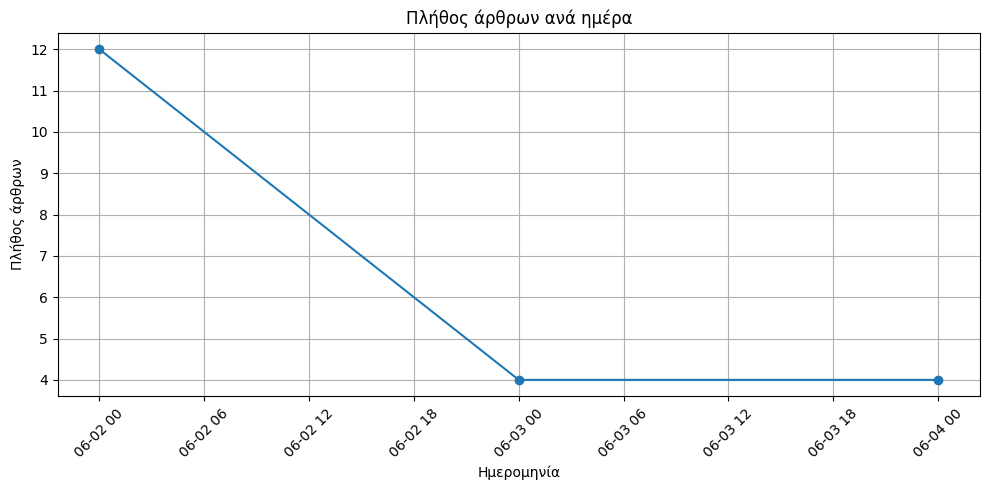

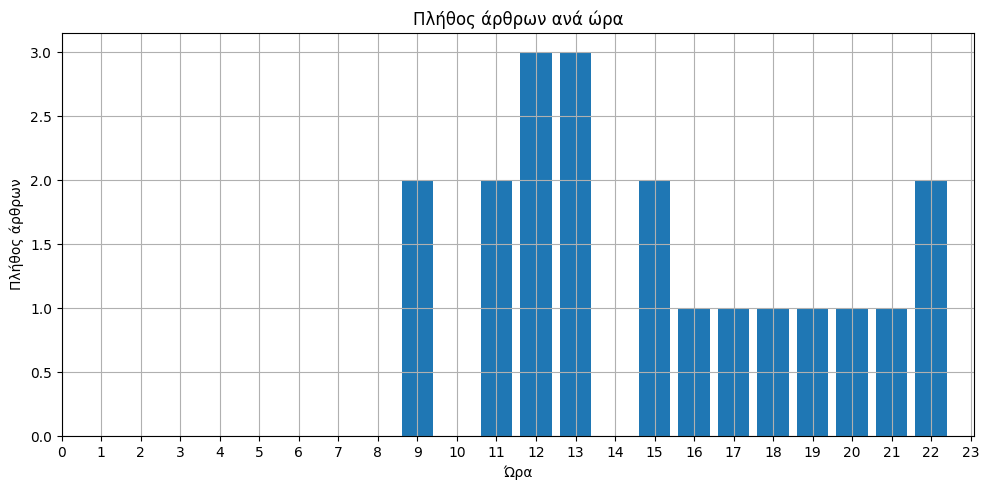

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Μετατροπή της στήλης 'datetime' σε datetime format
newsit_full_articles_df['datetime'] = pd.to_datetime(newsit_full_articles_df['datetime'])

# Πλήθος των άρθρων ανά ημέρα
articles_per_day = newsit_full_articles_df['datetime'].dt.date.value_counts().sort_index()

# Πλήθος των άρθρων ανά ώρα
articles_per_hour = newsit_full_articles_df['datetime'].dt.hour.value_counts().sort_index()

# Κατασκευή γραφήματος για τα άρθρα ανά ημέρα
plt.figure(figsize=(10,5))
plt.plot(articles_per_day.index, articles_per_day.values, marker='o')
plt.xlabel('Ημερομηνία')
plt.ylabel('Πλήθος άρθρων')
plt.title('Πλήθος άρθρων ανά ημέρα')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Κατασκευή γραφήματος για τα άρθρα ανά ώρα
plt.figure(figsize=(10,5))
plt.bar(articles_per_hour.index, articles_per_hour.values)
plt.xlabel('Ώρα')
plt.ylabel('Πλήθος άρθρων')
plt.title('Πλήθος άρθρων ανά ώρα')
plt.xticks(np.arange(0, 24, step=1))
plt.grid(True)
plt.tight_layout()
plt.show()


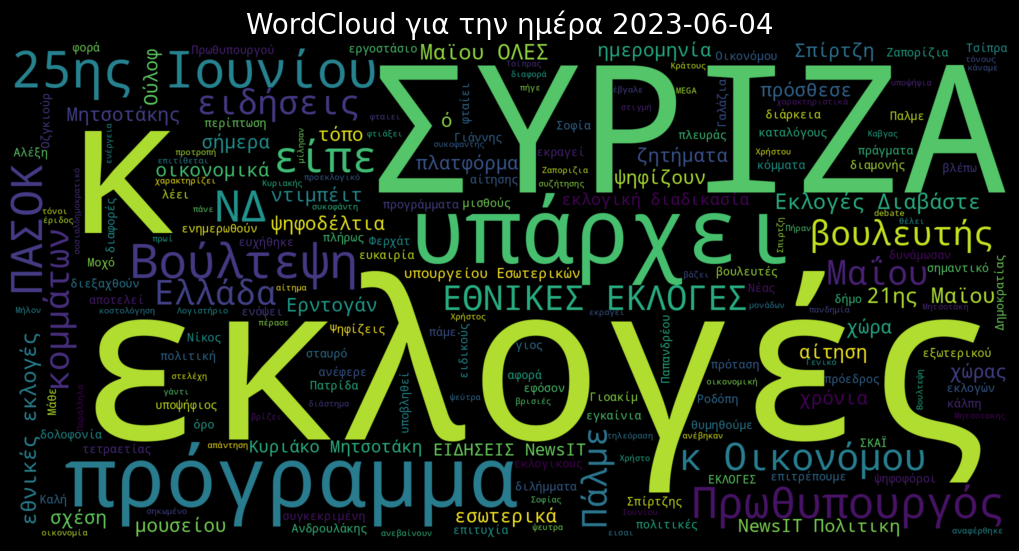

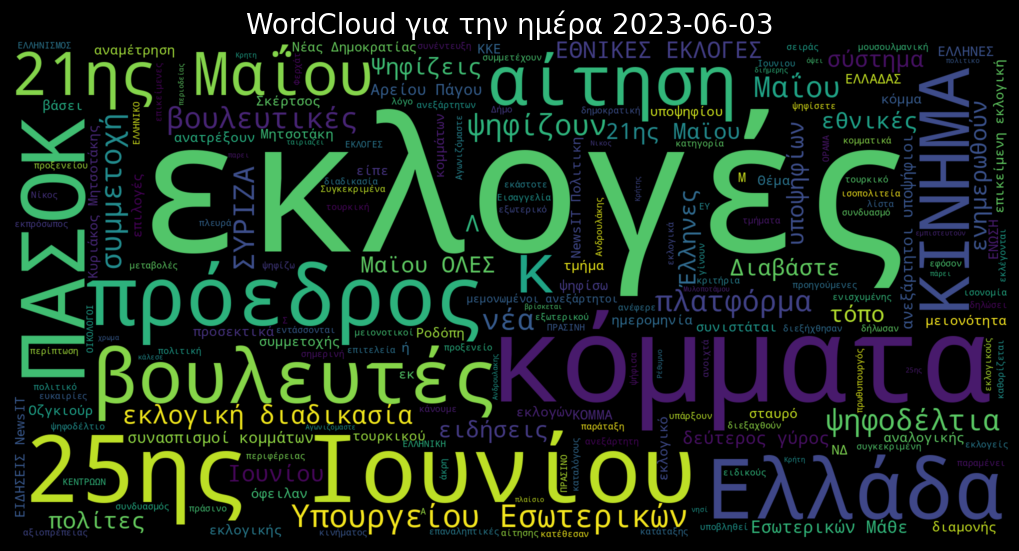

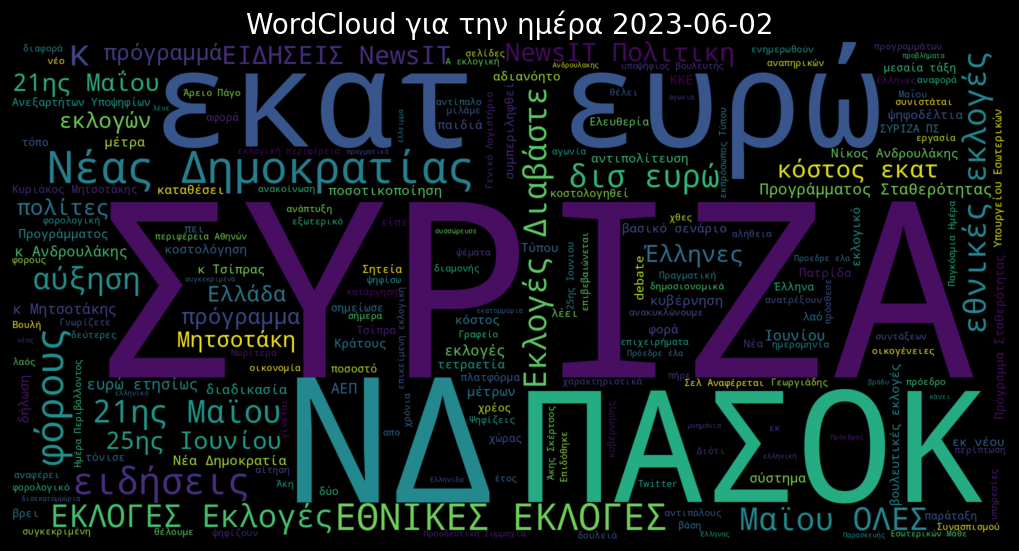

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def create_wordclouds(df, text_column):
    nlp = spacy.load('el_core_news_sm')

    # Πλήθος των άρθρων ανά ημέρα
    df['day'] = df['datetime'].dt.date
    unique_days = df['day'].unique()
    
    for day in unique_days:
        text = df[df['day']==day][text_column].str.cat(sep = ' ')
        wordcloud = WordCloud(
            stopwords = nlp.Defaults.stop_words,
            width = 2000,
            height = 1000,
            background_color = 'black'
        ).generate(text)
        fig = plt.figure(
            figsize = (10, 8),
            facecolor = 'k',
            edgecolor = 'k')
        plt.imshow(wordcloud, interpolation = 'bilinear')
        plt.axis('off')
        plt.tight_layout(pad=0)
        plt.title(f'WordCloud για την ημέρα {day}', fontsize=20, color='white')
        plt.show()
        print("\n")

create_wordclouds(newsit_full_articles_df, 'full_text')